In [111]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

home directory is unset
y1000plus_tools dir is unset
y1000plus data dir is unset
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
home directory is C:\Users\BMH_work\
y1000plus_tools dir is C:\Users\BMH_work\github\y1000plus_tools\
y1000plus data dir is C:\Users\BMH_work\github\y1000plus_tools\genomes\y1000plus\
Importing y1000plus_tools.py
sys.path : 

['C:\\Users\\BMH_work\\github\\y1000plus_tools\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env', '', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_

# Table of Contents

[Load y1000 trees and data](#load_data)

[For a given goi pair make a multiple sequence alignment](#make_msa)

[Independent runs of IQtree and bootstrap](#iq_tree_bootstrap)

[Find best tree](#find_best)

[Visualize Best trees](#best_trees)

[Visualize Time Calibrated Tree for Fig 3](#time_tree)

## Load y1000 trees and data
<a id=load_data> </a>

In [2]:
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

#Select only clades of interest: 
#clades_of_interest = {'Saccharomycetaceae','Saccharomycodaceae','Phaffomycetaceae','CUG-Ser2','CUG-Ser1','Pichiaceae','CUG-Ala'}
clades_of_interest = {'Saccharomycetaceae', 'Saccharomycodaceae'}
outgroups = [ 'Wickerhamomyces anomalus','Cyberlindnera jadinii', 'Ascoidea rubescens','Komagataella pastoris','Debaryomyces hansenii', 'Candida albicans', 'Yarrowia lipolytica']
#outgroup = 'Yarrowia lipolytica'

y1000_species_subset = y1000_species[(y1000_species['Major clade'].isin(clades_of_interest))  |  (y1000_species['Species name'].isin(outgroups))]


#outgroup = 'Hanseniaspora vineae'  #For EGO2/4 - only Sacch so use different outgroup
#y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['Species name']==outgroup]])
y1000_species_subset

#load specific outgroup proteins for example goi pairs
outgroup_dict = {'GPM2_GPM3': 'hanseniaspora_vinae_Seq_2544', 'GND2_GND1': 'yarrowia_lipolytica_Seq_1481', 'EGO4_EGO2': 'hanseniaspora_vinae_Seq_1783'}  # hanseniaspora alternative for GND1/2 'hanseniaspora_vinae_Seq_3519'

In [3]:
#Load prom_phyls which maps results from manual curation of WGH orthologs
prom_phyls = {}

prom_phyl = {}
prom_phyl_YGOB = {}
#prom_phyl['high'] = ['saccharomyces_cerevisiae_YDL021W', 'saccharomyces_mikatae_Seq_4168', 'saccharomyces_kudriavzevii_Seq_2898', 'saccharomyces_uvarum_Seq_298','candida_glabrata_Seq_689']
prom_phyl['high'] = ['saccharomyces_cerevisiae_YDL021W',
 'nakaseomyces_castellii_Seq_2450',
 'nakaseomyces_bacillisporus_Seq_147',
 'candida_glabrata_Seq_689',
 'nakaseomyces_bracarensis_Seq_1806',
 'nakaseomyces_delphensis_Seq_2587',
 'nakaseomyces_nivariensis_Seq_2262',
 'saccharomyces_eubayanus_Seq_4042',
 'saccharomyces_uvarum_Seq_298',
 'saccharomyces_arboricola_Seq_2168',
 'saccharomyces_kudriavzevii_Seq_2898',
 'saccharomyces_mikatae_Seq_4168',
 'saccharomyces_paradoxus_Seq_4505']


prom_phyl_YGOB['high'] = ['YDL021W', 'Smik_4.214','Skud_4.228','Suva_4.227', 'CAGL0K01705g']

#prom_phyl['low'] = ['saccharomyces_cerevisiae_YOL056W', 'saccharomyces_mikatae_Seq_453', 'saccharomyces_uvarum_Seq_4445', 'kazachstania_africana_Seq_41', 'naumovozyma_castellii_Seq_1503', 'naumovozyma_dairenensis_Seq_3200', 'tetrapisispora_blattae_Seq_2219', 'tetrapisispora_phaffii_Seq_3511', 'vanderwaltozyma_polyspora_Seq_4285']
prom_phyl['low'] = ['saccharomyces_cerevisiae_YOL056W',
 'kazachstania_africana_Seq_41',
 'naumovozyma_castellii_Seq_1503',
 'naumovozyma_dairenensis_Seq_3200',
 'saccharomyces_eubayanus_Seq_4127',
 'saccharomyces_mikatae_Seq_453',
 'saccharomyces_paradoxus_Seq_556',
 'saccharomyces_uvarum_Seq_4445',
 'tetrapisispora_phaffii_Seq_3511',
 'vanderwaltozyma_polyspora_Seq_4285',
 'yHAB132_kazachstania_martiniae_160519_Seq_4635',
 'yHAB133_kazachstania_unispora_160519_Seq_2374',
 'yHAB134_kazachstania_turicensis_160519_Seq_1990',
 'yHAB143_kazachstania_siamensis_160519_Seq_1903',
 'yHAB147_kazachstania_taianensis_160519_Seq_2501',
 'yHAB153_kazachstania_rosinii_160519_Seq_2148',
 'yHAB158_kazachstania_viticola_160519_Seq_4041',
 'yHAB159_kazachstania_solicola_160519_Seq_4608',
 'yHAB164_kazachstania_aerobia_160519_Seq_2028',
 'yHMPu5000034875_tetrapisispora_fleetii_160519_Seq_3577',
 'yHMPu5000034876_tetrapisispora_iriomotensis_160519_Seq_3652',
 'yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_4595']

prom_phyl_YGOB['low'] = ['YOL056W', 'Smik_15.103', 'Skud15.97', 'Suva15.109', 'KAFR0C00970', 'KNAG0K01200', 'NCAS0C03650', 'NDAI0G02990', 'TBLA0G00870', 'TPHA0P00600', 'Kpol_1045.50']

prom_phyls['GPM2_GPM3'] = prom_phyl

prom_phyl = {}
prom_phyl_YGOB = {}
#prom_phyl['high'] = ['saccharomyces_cerevisiae_YGR256W',  'saccharomyces_kudriavzevii_Seq_1713', 'saccharomyces_uvarum_Seq_4669', 'kazachstania_africana_Seq_4332', 'kazachstania_naganishii_Seq_4463']

prom_phyl['high'] = ['saccharomyces_cerevisiae_YGR256W',
 'kazachstania_africana_Seq_4332',
 'nakaseomyces_bacillisporus_Seq_4561',
 'saccharomyces_eubayanus_Seq_2030',
 'saccharomyces_uvarum_Seq_4669',
 'saccharomyces_arboricola_Seq_4380',
 'saccharomyces_kudriavzevii_Seq_1713',
 'saccharomyces_paradoxus_Seq_87',
 'yHAB158_kazachstania_viticola_160519_Seq_1107',
 'yHAB153_kazachstania_rosinii_160519_Seq_85',
 'yHAB155_kazachstania_spencerorum_160519_Seq_626',
 'yHAB132_kazachstania_martiniae_160519_Seq_4190',
 'yHAB148_kazachstania_intestinalis_160519_Seq_1326',
 'yHAB136_kazachstania_bromeliacearum_160519_Seq_3141',
 'kazachstania_naganishii_Seq_4463',
 'yHAB147_kazachstania_taianensis_160519_Seq_3956',
 'yHAB166_kazachstania_yakushimaensis_160519_Seq_4162',
 'yHAB154_kazachstania_transvaalensis_160519_Seq_432',
 'yHAB143_kazachstania_siamensis_160519_Seq_5064',
 'yHAB133_kazachstania_unispora_160519_Seq_1356',
 'yHAB164_kazachstania_aerobia_160519_Seq_1036',
 'yHAB159_kazachstania_solicola_160519_Seq_680']

prom_phyl_YGOB['high'] = ['YGR256W', 'Skud_7.590','Suva_7.554', 'KAFR0B04490', 'KNAG0K00390']

#prom_phyl['low'] = ['saccharomyces_cerevisiae_YHR183W', 'saccharomyces_mikatae_Seq_4845', 'saccharomyces_uvarum_Seq_4794', 'saccharomyces_kudriavzevii_Seq_185', 'candida_glabrata_Seq_5136', 'kazachstania_africana_Seq_551', 'naumovozyma_castellii_Seq_43', 'naumovozyma_dairenensis_Seq_164', 'tetrapisispora_blattae_Seq_92']
prom_phyl['low'] = ['saccharomyces_cerevisiae_YHR183W',
 'candida_glabrata_Seq_5136',
 'naumovozyma_castellii_Seq_43',
 'tetrapisispora_blattae_Seq_92',
 'yHMPu5000035629_yueomyces_sinensis_160519_Seq_977',
 'nakaseomyces_castellii_Seq_4652',
 'nakaseomyces_bacillisporus_Seq_1423',
 'nakaseomyces_bracarensis_Seq_1690',
 'nakaseomyces_delphensis_Seq_1403',
 'nakaseomyces_nivariensis_Seq_5143',
 'saccharomyces_eubayanus_Seq_879',
 'saccharomyces_uvarum_Seq_4794',
 'saccharomyces_arboricola_Seq_3052',
 'saccharomyces_kudriavzevii_Seq_185',
 'saccharomyces_mikatae_Seq_4845',
 'saccharomyces_paradoxus_Seq_2121',
 'naumovozyma_dairenensis_Seq_164',
 'yHAB158_kazachstania_viticola_160519_Seq_1939',
 'kazachstania_africana_Seq_551',
 'yHAB153_kazachstania_rosinii_160519_Seq_895',
 'yHAB155_kazachstania_spencerorum_160519_Seq_5608',
 'yHAB160_kazachstania_kunashirensis_160519_Seq_407',
 'yHAB134_kazachstania_turicensis_160519_Seq_2234',
 'yHAB148_kazachstania_intestinalis_160519_Seq_3782']

prom_phyl_YGOB['low'] = ['YHR183W', 'Smik_8.271', 'Skud_8.246', 'Suva_15.384', 'CAGL0M13343g','KAFR0B1610',  'NCAS0F02030', 'NDAI0C03490',  
'TBLA0C06670']
prom_phyls['GND2_GND1'] = prom_phyl


prom_phyl = {}
prom_phyl_YGOB = {}
prom_phyl['high'] = ['saccharomyces_cerevisiae_YNR034W-A',
 'naumovozyma_castellii_Seq_527',
 'naumovozyma_castellii_Seq_246',
 'naumovozyma_dairenensis_Seq_2475',
 'yHAB148_kazachstania_intestinalis_160519_Seq_3037',
 'yHAB132_kazachstania_martiniae_160519_Seq_325',
 'yHAB158_kazachstania_viticola_160519_Seq_4005',
 'kazachstania_africana_Seq_4330',
 'saccharomyces_paradoxus_Seq_2332',
 'saccharomyces_mikatae_Seq_3708',
 'saccharomyces_kudriavzevii_Seq_553',
 'saccharomyces_arboricola_Seq_2087',
 'saccharomyces_uvarum_Seq_2980',
 'saccharomyces_eubayanus_Seq_3615',
 'nakaseomyces_nivariensis_Seq_3763',
 'nakaseomyces_delphensis_Seq_68',
 'nakaseomyces_bracarensis_Seq_3421',
 'candida_glabrata_Seq_4115',
 'nakaseomyces_bacillisporus_Seq_4006',
 'nakaseomyces_castellii_Seq_4427']

prom_phyl_YGOB['high'] = ['YNR034W-A', 'Smik_14.365', 'Skud_14.367','Suva_14.390','CAGL0M11000g', 'KAFR0C04650', 'NCAS0A05440', 'NDAI0K02270', 'TBLA0F04160', 'TPHA0M01880']

prom_phyl['low'] = ['saccharomyces_cerevisiae_YCR075W-A',
 #'vanderwaltozyma_polyspora_Seq_2530',
 #'tetrapisispora_phaffii_Seq_1438',
 #'yHMPu5000034875_tetrapisispora_fleetii_160519_Seq_5131',
 #'yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_671',
 'nakaseomyces_castellii_Seq_2446',
 'nakaseomyces_bacillisporus_Seq_767',
 'candida_glabrata_Seq_2261',
 'nakaseomyces_bracarensis_Seq_2058',
 'nakaseomyces_delphensis_Seq_4094',
 'nakaseomyces_nivariensis_Seq_1080',
 'naumovozyma_castellii_Seq_2431',
 'naumovozyma_dairenensis_Seq_3886',
 'saccharomyces_eubayanus_Seq_1753',
 'saccharomyces_uvarum_Seq_2910',
 'saccharomyces_arboricola_Seq_2204',
 'saccharomyces_kudriavzevii_Seq_2030',
 'saccharomyces_mikatae_Seq_3347',
 'saccharomyces_paradoxus_Seq_2952',
 'yHAB158_kazachstania_viticola_160519_Seq_5786',
 'yHAB153_kazachstania_rosinii_160519_Seq_1089',
 'yHAB132_kazachstania_martiniae_160519_Seq_2564',
 'kazachstania_africana_Seq_1692']

prom_phyl_YGOB['low'] = ['YCR075W-A', 'Smik_3.176', 'Skud_3.149', 'Suva_3.113', 'CAGL0M07001g','KAFR0F04310', 'KNAG0I02790', 'NCAS0D04640', 'NDAI0I00320',  
'Kpol_1028.35']
prom_phyls['EGO4_EGO2'] = prom_phyl

#Note:   Missing K.Nag species from Low group
#Tbla missing from high group (see note below - I bet that is the issue)
#From YGOB search NOTE: 2 genes in the same pillar as NCAS0D04640 were not hit in these BLAST results
#LIST: TBLA0F04160 Suva_14.390
#Tpha on side I didn't expect
#Kpol and Tpha look like they ought to be on the same side (three genes in a row) 
#Going to leave out Kpol and Tpha
#Ncas check makes it look like NCAS0D04640 wasn't found (probably should check its orthogroup and add that sequence) 
#Also Ncas_246 wasn't part of YGOB so maybe it was a SSD in Castellii 



In [4]:
#genes of interest: 

#NOtice how many of these genes are very close on the genome MPC3, SOL4, ENO1, GND2


# gois = ['YGR043C','YLR354C', #Start strong Msn2/4 regulation NQM1/TAL1
#        'YGR256W', 'YHR183W', #GND2/GND1 - Missing genes swapped between expression and stres.
#         'YNR034W-A', 'YCR075W-A', #EGO4/EGO2 - lots of STREs 110_1183, 110_700
#         'YMR105C', 'YKL127W', #PGM2/PGM1 - still has STRE but expression goes away
#         #'YMR285C','YML118W', #NGL2/NGL3 - Poly-A RNA exonuclease - different OGs 
#         'YGR254W','YHR174W', #ENO1/ENO2
#         'YGR248W','YHR163W', #SOL4/SOL3 - strong PDS signal.  Not many orthologs for the duplicate - contradiction with orthogroups/YGOB somewhere
#         'YGR243W','YHR162W', #MPC3/MPC2 - Start Weak/no Msn2/4 effect: 
#         'YJL164C','YKL166C', #TPK1/TPK3   (but GIS1/RPH1 had an effect and there is a strong PDS) 
#         'YDL021W','YOL056W', #GPM2/GPM3 - #Start average Msn2/4 effect: expression data missing ortholog for high, I'm missing ortholog from low 
#         #'YPL230W','YMR182C' #USV1/RGM1 - Different OGs
#         'YNL093W','YOR089C',  #YPT53/VPS21  110_5384, 110_5422 YPT53 is a singleton in this OG set
#         'YOR237W','YPL145C',  # HES1/KES1
#         'YHR160C','YGR239C' # PEX21/PEX18 (order?)  Example of post WGH diff exp.  Intergenic region for pex 18 only 500bp.  Also has two orthogroups - one very small for PEX18 and no outgroups
#       ]

#Load ohnolog_dePKA data
fname = y1000plus_tools.yeast_esr_exp.data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv')

# with open(fname, 'rb') as file:
#     [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs_dePKA = pd.read_csv(fname, index_col=0)


goi_high = ['NQM1', 'GND2', 'EGO4', 'PGM2', 'ENO1', 'SOL4', 'FMP43', 'TPK1', 'GPM2', 'YPT53', 'HES1', 'PEX18', 'GPM2']  #Ego4 name used to be used: 'YNR034W-A'
ohnologs_goi_subset = ohnologs_dePKA[ohnologs_dePKA['SC_common_name_high'].isin(goi_high)]

gois = list(ohnologs_goi_subset['sc_genename_high'])+list(ohnologs_goi_subset['sc_genename_low'])


In [5]:
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]
#Add id for Naumovozyma castellii low-lFC gene for EGO2/4

y1000_id_list.append('100_2430')


goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

goi_pair_og_lookup = {}
for row in ohnologs_goi_subset.iterrows():
    genename_low = row[1]['sc_genename_low']
    genename_high = row[1]['sc_genename_high']
    
    high_low_common_name = row[1]['SC_common_name_high']+'_' + row[1]['SC_common_name_low']
    
    og_low = goi_og_lookup[y1000_ids[genename_low]]
    og_high = goi_og_lookup[y1000_ids[genename_high]]
    
    if og_low==og_high:
        goi_pair_og_lookup[high_low_common_name] = og_low
    else: 
        #In this case need to combine ogs
        og_list = [og_low, og_high]
        if high_low_common_name == 'EGO4_EGO2': 
            #Naumovozyma castellii had an orphan orthogroup for the ortholog of the Low-LFC gene
            og_list.append('OG38595')
        ogcomb_name, ogcomb_genes = y1000plus_tools.combine_ogs(og_list, og_genes_lookup) 
        
        #add new combined og list to og_genes_lookup and assign it as the og for the goi pair. 
        goi_pair_og_lookup[high_low_common_name] = ogcomb_name
        og_genes_lookup[ogcomb_name]=set(ogcomb_genes)


        
# #fix name for EGO4_EGO2
# goi_pair_og_lookup['EGO4_EGO2'] = goi_pair_og_lookup['YNR034W-A_YCR075W-A']   

goi_pair_og_lookup

more than one goi in same orthogroup :OG1193 found_genes: 
['110_757', '110_4425']
more than one goi in same orthogroup :OG1302 found_genes: 
['110_1562', '110_689']
more than one goi in same orthogroup :OG1407 found_genes: 
['110_5570', '110_2481']
more than one goi in same orthogroup :OG1488 found_genes: 
['110_326', '110_4266']
more than one goi in same orthogroup :OG1667 found_genes: 
['110_1753', '110_821']
more than one goi in same orthogroup :OG3991 found_genes: 
['110_1058', '110_4019']
more than one goi in same orthogroup :OG4796 found_genes: 
['110_1854', '110_2527']
more than one goi in same orthogroup :OG6005 found_genes: 
['110_2716', '110_1259']


{'GND2_GND1': 'OG1488',
 'TPK1_TPK3': 'OG4796',
 'YPT53_VPS21': 'OG3881_OG118797',
 'PGM2_PGM1': 'OG1302',
 'GPM2_GPM3': 'OG6005',
 'NQM1_TAL1': 'OG1667',
 'ENO1_ENO2': 'OG1193',
 'SOL4_SOL3': 'OG3991',
 'PEX18_PEX21': 'OG6721_OG22619',
 'EGO4_EGO2': 'OG6958_OG10444_OG38595',
 'HES1_KES1': 'OG1407'}

In [22]:
#Delete this if no problems
#Combine two orthogroups because of external evidence of orthologous relationship: 
# e.g. EGO2 and EGO4 as paralogs, or synteny - Ncas low protein


# og_list = ['OG6958', 'OG10444', 'OG38595']

# def combine_ogs(og_list, og_genes_lookup): 
#     #takes list of ogs and og_genes_lookup and outputs a combined orthogroup name
#     #and combined orthogroup list
#     ogcomb_name = '_'.join(og_list)

#     ogcomb_genes = []
#     for og in og_list: 
#         ogcomb_genes = ogcomb_genes + list(og_genes_lookup[og])

#     return ogcomb_name, ogcomb_genes
    

# #EGO2: 110_700
# og1_line = 'OG6958: 299_59 145_2563 54_1183 57_473 61_2336 65_3281 135_4298 166_2391 223_835 300_4167 109_2203 110_700 111_1752 112_2029 113_3346 114_2951 115_2909 133_1437 136_2529 207_1375 208_1837 217_1311 220_5130 48_1691 50_4079 51_1157 56_2944 58_3655 59_3473 62_3438 63_1065 64_717 219_4548 222_670 164_5034 19_2260 218_1421 341_2448 342_2639 95_2057 98_1079 38_55 96_2445 39_3944 40_1411 46_1782 60_1097 7_3017 94_766 247_4091 41_4060 55_1119 155_5785 97_4093 152_1088 248_2694 316_3531 323_2667 324_593 44_2693 45_300'
# og1_name = og1_line.split(':')[0]
# og1_genes = og1_line.split(':')[1].split(' ')[1:]

# #EGO4: 110_1183
# og2_line = 'OG10444: 100_245 100_526 145_324 101_2474 151_3036 155_4004 48_4329 109_2086 110_1183 111_3614 112_552 113_3707 114_2331 115_2979 19_4114 94_4005 95_3420 96_4426 97_67 98_3762'
# og2_name = og2_line.split(':')[0]
# og2_genes = og2_line.split(':')[1].split(' ')[1:]

# ogcomb_name = og1_name + '_' + og2_name
# ogcomb_genes = og1_genes + og2_genes

# y1000_species_subset_ogs = set(y1000_species_subset['spec_og_id'])
# genes_specs = {gene_ind for gene_ind in ogcomb_genes if int(gene_ind.split('_')[0]) in y1000_species_subset_ogs}

# goi_og_lookup['110_700'] = ogcomb_name
# goi_og_lookup['110_1183'] = ogcomb_name

# og_genes_lookup[ogcomb_name] = genes_specs


In [35]:
# #Test to see which orthogroups have something from outgroup
# for y1000_id, goi in y1000_ids.items():
#     print(y1000_id)
#     og_genes = og_genes_lookup[goi_og_lookup[goi]]
#     for gene in og_genes: 
#         if gene.split('_')[0]=='144':
#             print(gene)

# #Results: 
# #GPM2/GPM3 no ortholog in Y. Lipolitica
# #TPK1/TPK3 no ortholog in Y. lipolitica (interesting...)  
# # Need to find new outgroup for those

In [27]:
# #Extract promoters for all goi pairs
# L_prom = 1000

# for jj, goi_common_name in enumerate(gois_common_names):
#     print(goi_common_name)
#     goi = gois[jj]
#     goi_y1000_id = scer_lookup.loc[goi]['y1000_id']
#     og = goi_og_lookup[goi_y1000_id]
#     og_genes = og_genes_lookup[og]

#     #For a given orthogroup extract promoters
#     og_genes_y1000_gene_id = y1000plus_tools.extract_promoters(L_prom, og, og_genes, y1000_species_subset, fname_string=goi_common_name)
#     print(goi_common_name + ' promoter extraction complete')

In [6]:
#For a given goi_pair, get y1000 promoters 
L_prom = 700

goi_pair = 'EGO4_EGO2' #'GPM2_GPM3' #'GND2_GND1'#'ENO1_ENO2' #'EGO4_EGO2'#
ogs = goi_pair_og_lookup[goi_pair]
# if len(ogs.split('_'))==2: 
#     og1, og2 = ogs.split('_')
#     og_genes = og_genes_lookup[og1] | og_genes_lookup[og2]
# else:
og_genes = og_genes_lookup[ogs]

#For a given orthogroup extract promoters

y1000plus_tools.extract_promoters(L_prom, ogs, og_genes, y1000_species_subset, fname_string=goi_pair)
print(goi_pair + ' promoter extraction complete')

# protein_fname = goi_pair + '_' + og
# y1000plus_tools.extract_promoter_seqs(og_genes, protein_fname, y1000_species_subset)
# print(goi_pair + ' protein sequence extraction complete')

EGO4_EGO2 promoter extraction complete


## For a given goi pair make a multiple sequence alignment
<a id=make_msa> </a>

In [52]:
#For a given goi_pair, get protein sequences

goi_pair = 'EGO4_EGO2' #'EGO4_EGO2' #'GND2_GND1' #'GPM2_GPM3' #'EGO4_EGO2' #'ENO1_ENO2'
ogs = goi_pair_og_lookup[goi_pair]
# if len(ogs.split('_'))==2: 
#     og1, og2 = ogs.split('_')
#     og_genes = og_genes_lookup[og1] | og_genes_lookup[og2]
# else:
og_genes = og_genes_lookup[ogs]

In [ ]:
# #Checking for outgroup for EGO2/4
# y1000_species[y1000_species['Major clade']=='Sporopachydermia clade']['spec_og_id']
# genes_specs = [int(gene_ind.split('_')[0]) for gene_ind in ogcomb_genes]
# subset = y1000_species[y1000_species['spec_og_id'].isin(genes_specs)]
# subset[subset['Major clade']=='Saccharomycodaceae']


# # EGO4/2 outgroup species is , protein is Hanseniaspora vineae '46_1782'

In [48]:
#choose outgroup species (important for making protein trees from multiple sequence alignments) 
outgroup = 'Yarrowia lipolytica' #'Hanseniaspora vineae'#'Yarrowia lipolytica' #'Lipomyces starkeyi' # 'Tortispora starmeri' #'Lipomyces starkeyi'   #Lipomyces starkeyi is a good outgroup for all the species

outgroup_orig_genome = y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'].values[0]

#Test to see if orthogroup has something from outgroup: 

y1000_id_outgroup = y1000_species_subset[y1000_species_subset['Species name']==outgroup]['spec_og_id'].values[0]

outgroup_gene = ''
for gene in og_genes:#og_genes: 
    y1000_spec_id = gene.split('_')[0]
    if y1000_spec_id == str(y1000_id_outgroup):
        outgroup_gene = gene
        

if outgroup_gene =='': 
    print(outgroup + ' has no proteins in og ' + ogs + ' for ' + goi_pair + '. Pick another outgroup')
else: 
    print('outgroup gene = ' + outgroup_gene)

home directory is unset
y1000plus_tools dir is unset
y1000plus data dir is unset
Yarrowia lipolytica has no proteins in og OG6958_OG10444_OG38595 for EGO4_EGO2. Pick another outgroup


In [18]:
#Check to see which major clades / species are present in the orthogroup if 
#there is no good outgroup
specs_in_og = []
for gene in og_genes: 
    specs_in_og.append(gene.split('_')[0])

set(y1000_species_subset[y1000_species_subset['spec_og_id'].isin(set(specs_in_og))]['Major clade'])


{'Saccharomycetaceae', 'Saccharomycodaceae'}

In [65]:
protein_fname = goi_pair + '_' + ogs
y1000plus_tools.extract_protein_seqs(og_genes, protein_fname, y1000_species_subset)
print(goi_pair + ' protein sequence extraction complete')



lachancea_nothofagi
yHAB132_kazachstania_martiniae_160519
yHMPu5000034866_zygosaccharomyces_bisporus_160519
yHMPu5000035696_hanseniaspora_singularis_160519
lachancea_fermentati
saccharomyces_arboricola
eremothecium_sinecaudum
ashbya_aceri
nakaseomyces_delphensis
yHMPu5000035684_kloeckera_hatyaiensis_160519
zygosaccharomyces_bailii
yHMPu5000035695_hanseniaspora_pseudoguilliermondii_160519
saccharomyces_uvarum
yHAB158_kazachstania_viticola_160519
yHMPu5000035652_torulaspora_maleeae_160613
naumovozyma_castellii
eremothecium_coryli
naumovozyma_dairenensis
saccharomyces_mikatae
yHMPu5000034862_zygotorulaspora_florentina_160519
yHMPu5000034877_tetrapisispora_namnaonensis_160519
eremothecium_cymbalariae
yHMPu5000034709_kluyveromyces_aestuarii_160519
candida_glabrata
lachancea_mirantina
vanderwaltozyma_polyspora
saccharomyces_paradoxus
saccharomyces_cerevisiae
yHMPu5000035651_torulaspora_microellipsoides_160519
nakaseomyces_bacillisporus
lachancea_waltii
tetrapisispora_phaffii
nakaseomyces_bra

In [57]:
outgroup_dict = {'GPM2_GPM3': 'hanseniaspora_vinae_Seq_2544', 'GND2_GND1': 'hanseniaspora_vinae_Seq_3519', 'EGO4_EGO2': 'hanseniaspora_vinae_Seq_1783'}

In [73]:
#Commands to make alignment using MAFFT, trim using TrimAL, and run IQTREE


goi_pair = 'EGO4_EGO2'#'GND2_GND1'  #'EGO4_EGO2'#'GPM2_GPM3'#'EGO4_EGO2'# 'ENO1_ENO2'
og = goi_pair_og_lookup[goi_pair]


protein_fname_base_ubuntu = '/mnt/c' + "/".join(y1000plus_dir.split(':')[1].split('\\')) + 'proteins_og/' + goi_pair + '_' + og + '/' + goi_pair + '_' + og
protein_fname_base = y1000plus_dir +  os.path.normpath('proteins_og/' + goi_pair + '_' + og + '/' + goi_pair + '_' + og)

#Mafft command

#This is the E-ENS-i algorithm which is suitable for conserved regions separated by long unaligned gaps. https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html

#Mafft 7.310-1
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                protein_fname_base_ubuntu + '.fasta', 
                '>',
                protein_fname_base_ubuntu + '_aln.fasta']

print("run these commands from the appropriate directory\n\nMAFFT command\n")
print(" ".join(mafft_command))


#trimal 1.2r59
trimal_command = ['/home/heineike/bioinformatics/trimAl/source/trimal',
                  '-in', protein_fname_base_ubuntu + '_aln.fasta', 
                  '-out', protein_fname_base_ubuntu + '_aln_trimmed.fasta', 
                  '-gappyout']

print("\nTrimal command\n")
print(" ".join(trimal_command))

#alternative trimming protocol - open up on Jalview and trim by eye. Save as _trimmed.fasta, then find and replace
# all "/" at the end of each gene name with a space. 


#Running it from this notebook seems slow
#!{" ".join(mafft_command)}


print(" ".join(mafft_command))

#This is the E-ENS-i algorithm which is suitable for conserved regions separated by long unaligned gaps. https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html
#tree command: (designated outgroup)




run these commands from the appropriate directory

MAFFT command

mafft --genafpair --maxiterate 1000 /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/proteins_og/EGO4_EGO2_OG6958_OG10444_OG38595/EGO4_EGO2_OG6958_OG10444_OG38595.fasta > /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/proteins_og/EGO4_EGO2_OG6958_OG10444_OG38595/EGO4_EGO2_OG6958_OG10444_OG38595_aln.fasta

Trimal command

/home/heineike/bioinformatics/trimAl/source/trimal -in /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/proteins_og/EGO4_EGO2_OG6958_OG10444_OG38595/EGO4_EGO2_OG6958_OG10444_OG38595_aln.fasta -out /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/proteins_og/EGO4_EGO2_OG6958_OG10444_OG38595/EGO4_EGO2_OG6958_OG10444_OG38595_aln_trimmed.fasta -gappyout
mafft --genafpair --maxiterate 1000 /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/proteins_og/EGO4_EGO2_OG6958_OG10444_OG38595/EGO4_EGO2_OG6958_OG10444_OG38595.fasta > /mnt/c/Users/BMH

In [80]:
protein_fname_aln = protein_fname_base + '_aln.fasta'
prot_seqs = SeqIO.parse(protein_fname_aln, "fasta")  

outgroup_id = outgroup_dict[goi_pair]

# #routine for figuring out outgroup_id if we don't use the outgroup_dict
# if outgroup_gene == None: 
#     print('No outgroup gene designated - need to pick outgroup gene')

# for seq in prot_seqs: 
#     y1000_id = seq.description.split(' ')[1].split('=')[1]
#     if y1000_id == outgroup_gene:
#         outgroup_id = seq.id


#True on old server
#print("Note: for iqtree to run you need to activate the seqanalysis python environment: . activate /home/lab/envs/seqanalysis")


#iqtree-1.6.12 linux 64 bit
iqtree_command = ["/home/heineike/bioinformatics/iqtree/iqtree-1.6.12-Linux/bin/iqtree", 
                  "-s" , protein_fname_base_ubuntu + '_aln_trimmed.fasta',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id]
print(" ".join(iqtree_command))



/home/heineike/bioinformatics/iqtree/iqtree-1.6.12-Linux/bin/iqtree -s /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/proteins_og/EGO4_EGO2_OG6958_OG10444_OG38595/EGO4_EGO2_OG6958_OG10444_OG38595_aln_trimmed.fasta -nt AUTO -o hanseniaspora_vinae_Seq_1783


In [ ]:
C:\Users\BMH_work\github\y1000plus_tools\genomes\y1000plus\proteins_og\EGO4_EGO2_OG6958_OG10444_OG38595

In [ ]:
#Notes: For EGO4_EGO2, redid alignment and ran TRIMAI from phylemon2 on 23 May 2019.  


## Independent runs of IQtree and bootstrap analysis
<a id=iq_tree_bootstrap> </a>

In [15]:
goi_pair = "GND2_GND1" # 'EGO4_EGO2'#"GND2_GND1" #  "GPM2_GPM3" # 
og = goi_pair_og_lookup[goi_pair]

In [16]:
#single command

protein_fname_base = "${aln_dir}"

iqtree_command = ["iqtree", 
                  "-s" , protein_fname_base + '_aln_trimmed.fasta',
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_id, 
                  "-m", "MF"     #Only runs model finder which will find the best model for use in subsequent routine
                 ]
print(" ".join(iqtree_command))

iqtree -s ${aln_dir}_aln_trimmed.fasta -nt AUTO -o yarrowia_lipolytica_Seq_1481 -m MF


In [17]:
#Make sure to start screen session so that you can exit the terminal while it is running
print('screen')

N_runs = 3

#Run multiple times to verify the chosen model is stable. 

model_command = ["/home/heineike/github/y1000plus_tools/scripts/20190923_iqtree_model_run.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair] #outgroup
                ]
print(" ".join(model_command))



screen
/home/heineike/github/y1000plus_tools/scripts/20190923_iqtree_model_run.sh GND2_GND1_OG1488 3 yarrowia_lipolytica_Seq_1481


In [84]:
#For EGO4_EGO2, ran it with both types of trees: 
#Make sure to start screen session so that you can exit the terminal while it is running
print('screen')

N_runs = 3

#Model runs

model_command = ["/mnt/c/Users/BMH_work/github/y1000plus_tools/scripts/20190924_iqtree_model_runs_linsi_einsi.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair] #outgroup
                ]
print(" ".join(model_command))


screen
/mnt/c/Users/BMH_work/github/y1000plus_tools/scripts/20190924_iqtree_model_runs_linsi_einsi.sh EGO4_EGO2_OG6958_OG10444_OG38595 3 hanseniaspora_vinae_Seq_1783


In [85]:

#Could extract these automatically from the files, but for now just make a dictionary
model_dict = {"GPM2_GPM3": "LG+F+I+G4", "GND2_GND1" :"LG+R5", "EGO4_EGO2": "LG+I+G4"} # "EGO4_EGO2": "GND2_GND1" :"LG+R5"  }  ##   # 'EGO4_EGO2'#



#iqtree runs
N_runs = 10
tree_command = ["/mnt/c/Users/BMH_work/github/y1000plus_tools/scripts/20190924_iqtree_runs.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair],  #outgroup
                 model_dict[goi_pair]     #Best model based on model finder runs above
                ]
print(" ".join(tree_command))

/mnt/c/Users/BMH_work/github/y1000plus_tools/scripts/20190924_iqtree_runs.sh EGO4_EGO2_OG6958_OG10444_OG38595 10 hanseniaspora_vinae_Seq_1783 LG+I+G4


In [38]:
#Do separate runs for linsi and einsi trimmed alignments

#Could extract these automatically from the files, but for now just make a dictionary
model_dict = {"GPM2_GPM3": "LG+F+I+G4", "GND2_GND1" :"LG+R5", "EGO4_EGO2": "LG+I+G4"} # "EGO4_EGO2": "GND2_GND1" :"LG+R5"  }  ##   # 'EGO4_EGO2'#



#iqtree runs
N_runs = 10
tree_command = ["/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_runs_linsi_einsi.sh", 
                 goi_pair + "_" + og, #input directory
                 str(N_runs),
                 outgroup_dict[goi_pair],  #outgroup
                 model_dict[goi_pair]     #Best model based on model finder runs above
                ]
print(" ".join(tree_command))

/home/heineike/github/y1000plus_tools/scripts/20190924_iqtree_runs_linsi_einsi.sh EGO4_EGO2_OG10444_OG6958 10 hanseniaspora_vinae_Seq_1783 LG+I+G4


### Visualize all trees from a particular set

In [95]:
#Plot phylogenetic tree of each run 

goi_pair = 'EGO4_EGO2'# 'GPM2_GPM3' #'GND2_GND1'#'EGO4_EGO2'#
og = goi_pair_og_lookup[goi_pair]

tree_dir = os.path.normpath(y1000plus_dir + "proteins_og/" + goi_pair +"_" + og + "/tree") + os.sep
N_runs = 10
og = goi_pair_og_lookup[goi_pair]
# if goi_pair == 'EGO4_EGO2':
#     aln_types = ['einsi', 'linsi']
#     spacer = '_'
# else: 
aln_types = ['']
spacer = ''



for jj in range(1,N_runs + 1):
    print(jj)
    for aln_type in aln_types: 
        fname_tree = os.path.normpath(tree_dir + 'run' + spacer + aln_type + spacer + str(jj) + '/' + goi_pair +"_" + og + "_aln" + spacer + aln_type+ "_trimmed.fasta.treefile" )
        fname_out = os.path.normpath(tree_dir + 'ml_tree_run_' + aln_type+ spacer + str(jj) +  ".svg" )
        y1000plus_tools.plot_tree_boot_alrt(goi_pair, prom_phyls, fname_tree, fname_out, y1000_species_subset)

1
2
3
4
5
6
7
8
9
10


### Find best tree 
<a id=find_best> </a>

In [ ]:
#Check best EGO trees

In [96]:
N_runs = 10
goi_pair = 'EGO4_EGO2'#'GPM2_GPM3'# 'GND2_GND1'#'EGO4_EGO2'#
og = goi_pair_og_lookup[goi_pair]

#fig, axarr = plt.subplots(5,2,figsize = (20,50))

tree_dir = os.path.normpath(y1000plus_dir + "proteins_og/" + goi_pair +"_" + og + "/tree") + os.sep


ml_vals = {}
column_headers = OrderedDict([#('model_params',"Site proportion and rates:"),
                              ('likelihood', "Log-likelihood of the tree:"),
                              ('likelihood_std', "Log-likelihood of the tree:"),
                              ('unconstrained_likelihood', "Unconstrained log-likelihood (without tree):"),
                              ('free_params', "Number of free parameters (#branches + #model parameters):"), 
                              ('AIC', "Akaike information criterion (AIC) score:"),
                              ('AIC_corr', "Corrected Akaike information criterion (AICc) score:"), 
                              ('BIC', "Bayesian information criterion (BIC) score:"),
                              ('tree_len', "Total tree length (sum of branch lengths):"),
                              ('int_branch_len_sum', "Sum of internal branch lengths:"),
                              ('int_branch_len_sum_pct', "Sum of internal branch lengths:")
                              ])



for jj in range(1,N_runs+1):
    #print(jj)
   
    #extract max likelihood
    
#     if goi_pair == 'EGO4_EGO2':
#         aln_types = ['einsi', 'linsi']
#         spacer = '_'
#     else: 
    aln_types = ['']
    spacer = ''
    
    for aln_type in aln_types: 
        #fnames = tree_dir + 'run' + str(jj) + '/' + goi_pair +"_" + og + "_aln_trimmed.fasta.iqtree"
        fname = tree_dir + 'run' + spacer + aln_type + spacer + str(jj) + '/' + goi_pair +"_" + og + "_aln" + spacer + aln_type+ "_trimmed.fasta.iqtree" 
        ind = str(jj) + spacer + aln_type
        ml_vals[ind] = []
            
        with open(fname) as f: 
            lines = f.readlines()
            for line in lines: 
    #             if column_headers['model_params'] in line: 
    #                 ml_vals[jj].append([tuple([float(item2.strip('()')) for item2 in item.split(',')]) for item in line.split(column_headers['model_params'])[1].split()])
                if column_headers['likelihood'] in line:
                    ml_vals[ind].append(float(line.split(column_headers['likelihood'] )[1].split()[0]))
                    ml_vals[ind].append(float(line.split(column_headers['likelihood_std'] )[1].split()[2].strip(")")))
                elif column_headers['unconstrained_likelihood'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['unconstrained_likelihood'])[1].strip()))
                elif column_headers['free_params'] in line: 
                    ml_vals[ind].append(int(line.split(column_headers['free_params'])[1].strip()))
                elif column_headers['AIC'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['AIC'])[1].strip()))
                elif column_headers['AIC_corr'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['AIC_corr'])[1].strip()))
                elif column_headers['BIC'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['BIC'])[1].strip()))
                elif column_headers['tree_len'] in line: 
                    ml_vals[ind].append(float(line.split(column_headers['tree_len'])[1].strip()))
                elif column_headers['int_branch_len_sum'] in line:
                    ml_vals[ind].append(float(line.split(column_headers['int_branch_len_sum'])[1].split()[0]))
                    ml_vals[ind].append(float(line.split(column_headers['int_branch_len_sum_pct'])[1].split()[1].strip('(%')))
            #             elif header ==  :
#                 ml_vals
            
    
        assert len(ml_vals[ind])==len(column_headers.keys()), "Didn't find all headers in one or more runs"

ml_vals_df = pd.DataFrame.from_dict(ml_vals, orient="index", columns=column_headers.keys())

    #Visualize full tree
    #visualize subset of tree
    
print('Best tree by likelihood: ' + str(ml_vals_df['likelihood'].idxmax()))
print('Best tree by AIC: ' + str(ml_vals_df['AIC'].idxmin()))
print('Best tree by AIC_corr: ' + str(ml_vals_df['AIC_corr'].idxmin()))
print('Best tree by BIC: ' + str(ml_vals_df['BIC'].idxmin()))

#Tree run 4 is best for GND2_GND1
#Tree runs 4 and 6 are best for GPM2/GPM3 (but they are very similar)

#In general, einsi gave better likelihood than linsi.  The best trees by likelihood were 4 and 9, but all but #6 were within 0.0001. 
#9 had the best BIC, but 1,2,4,7, and 10 all had similar scores
#1,2,4,9 had the best AIC_corr, but 8,3, 7, 10 also had similar scores. 

#For linsi scores

# Best tree by likelihood: 1_linsi (all have the same likelihood)
# Best tree by AIC: 3_linsi  
# Best tree by AIC_corr: 3_linsi 3,4 have the best, and all but 1 just 0.0001 away.  1 is just 0.0002 away
# Best tree by BIC: 3_linsi  3,4,5,6 tied for best, but others just 0.0001 away

Best tree by likelihood: 4
Best tree by AIC: 3
Best tree by AIC_corr: 3
Best tree by BIC: 4


In [124]:
#ml_vals_df[ml_vals_df['likelihood']>=(ml_vals_df.loc['4_einsi','likelihood']-0.0001)]
# ml_vals_df[ml_vals_df['BIC']<=(ml_vals_df.loc['9_einsi','BIC'] + 0.0001)] #-0.0001)]
# ml_vals_df[ml_vals_df['AIC_corr']<=(ml_vals_df.loc['1_einsi','AIC_corr'] + 0.0001)] #-0.0001)]
ml_vals_df_linsi = ml_vals_df.loc[[str(jj) + '_linsi' for jj in range(1,11)],:]

# print('Best tree by likelihood: ' + str(ml_vals_df_linsi['likelihood'].idxmax()))
# print('Best tree by AIC: ' + str(ml_vals_df_linsi['AIC'].idxmin()))
# print('Best tree by AIC_corr: ' + str(ml_vals_df_linsi['AIC_corr'].idxmin()))
# print('Best tree by BIC: ' + str(ml_vals_df_linsi['BIC'].idxmin()))

# ml_vals_df_linsi[ml_vals_df_linsi['likelihood']>=(ml_vals_df_linsi.loc['1_linsi','likelihood']-0.0001)]
#ml_vals_df_linsi[ml_vals_df_linsi['BIC']<=(ml_vals_df_linsi.loc['3_linsi','BIC'] + 0.0001)] #-0.0001)]
ml_vals_df_linsi[ml_vals_df_linsi['AIC_corr']<=(ml_vals_df_linsi.loc['3_linsi','AIC_corr'] + 0.0001)] #-0.0001)]

,likelihood,likelihood_std,unconstrained_likelihood,free_params,AIC,AIC_corr,BIC,tree_len,int_branch_len_sum,int_branch_len_sum_pct
2_linsi,-6626.9911,316.2628,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4808,13.1406,47.8175
3_linsi,-6626.9911,316.2638,-333.0867,161,13575.9821,65739.9821,13953.3348,27.4783,13.1395,47.8177
4_linsi,-6626.9911,316.2642,-333.0867,161,13575.9821,65739.9821,13953.3348,27.4800,13.1406,47.8190
5_linsi,-6626.9911,316.2632,-333.0867,161,13575.9822,65739.9822,13953.3348,27.4786,13.1398,47.8183
6_linsi,-6626.9911,316.2623,-333.0867,161,13575.9822,65739.9822,13953.3348,27.4808,13.1404,47.8166
7_linsi,-6626.9911,316.2645,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4795,13.1400,47.8177
9_linsi,-6626.9911,316.2623,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4810,13.1409,47.8180
10_linsi,-6626.9911,316.2636,-333.0867,161,13575.9822,65739.9822,13953.3349,27.4814,13.1413,47.8188


### Visualize best trees
<a id=best_trees> </a>

In [96]:
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('4','')}     #('_einsi_9','einsi_')

goi_pair = 'EGO4_EGO2' #'GPM2_GPM3'#'GND2_GND1'#'GPM2_GPM3' #'EGO4_EGO2'
og = goi_pair_og_lookup[goi_pair]


fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')




In [15]:
# t = Tree(fname_tree, format=1)
# t.ladderize()
# ts = TreeStyle()
# ts.show_leaf_name = True
# ts.show_branch_length = True
# # t_abbrev = t.copy()
# # left_leaves = set(t_abbrev.get_leaf_names())
# # for node_name, (node1, node2) in anc_nodes.items(): 
# #     print(node_name)
# #     anc_node = t_abbrev.get_common_ancestor([node1, node2])
# #     print(anc_node.name)
# #     if len(anc_node.name.split('/'))==2:
# #         anc_node.add_features(shalrt=anc_node.name.split('/')[0], bootstrap=anc_node.name.split('/')[1])
# #     else:
# #         anc_node.add_features(shalrt=np.nan,bootstrap = np.nan)
# #     anc_node.name = node_name
# #     left_leaves = left_leaves - set(anc_node.get_leaf_names())
# #     #print(left_leaves)


# # t_abbrev.prune(list(anc_nodes.keys()) + list(left_leaves))
# # print(t_abbrev)
# # print(t)

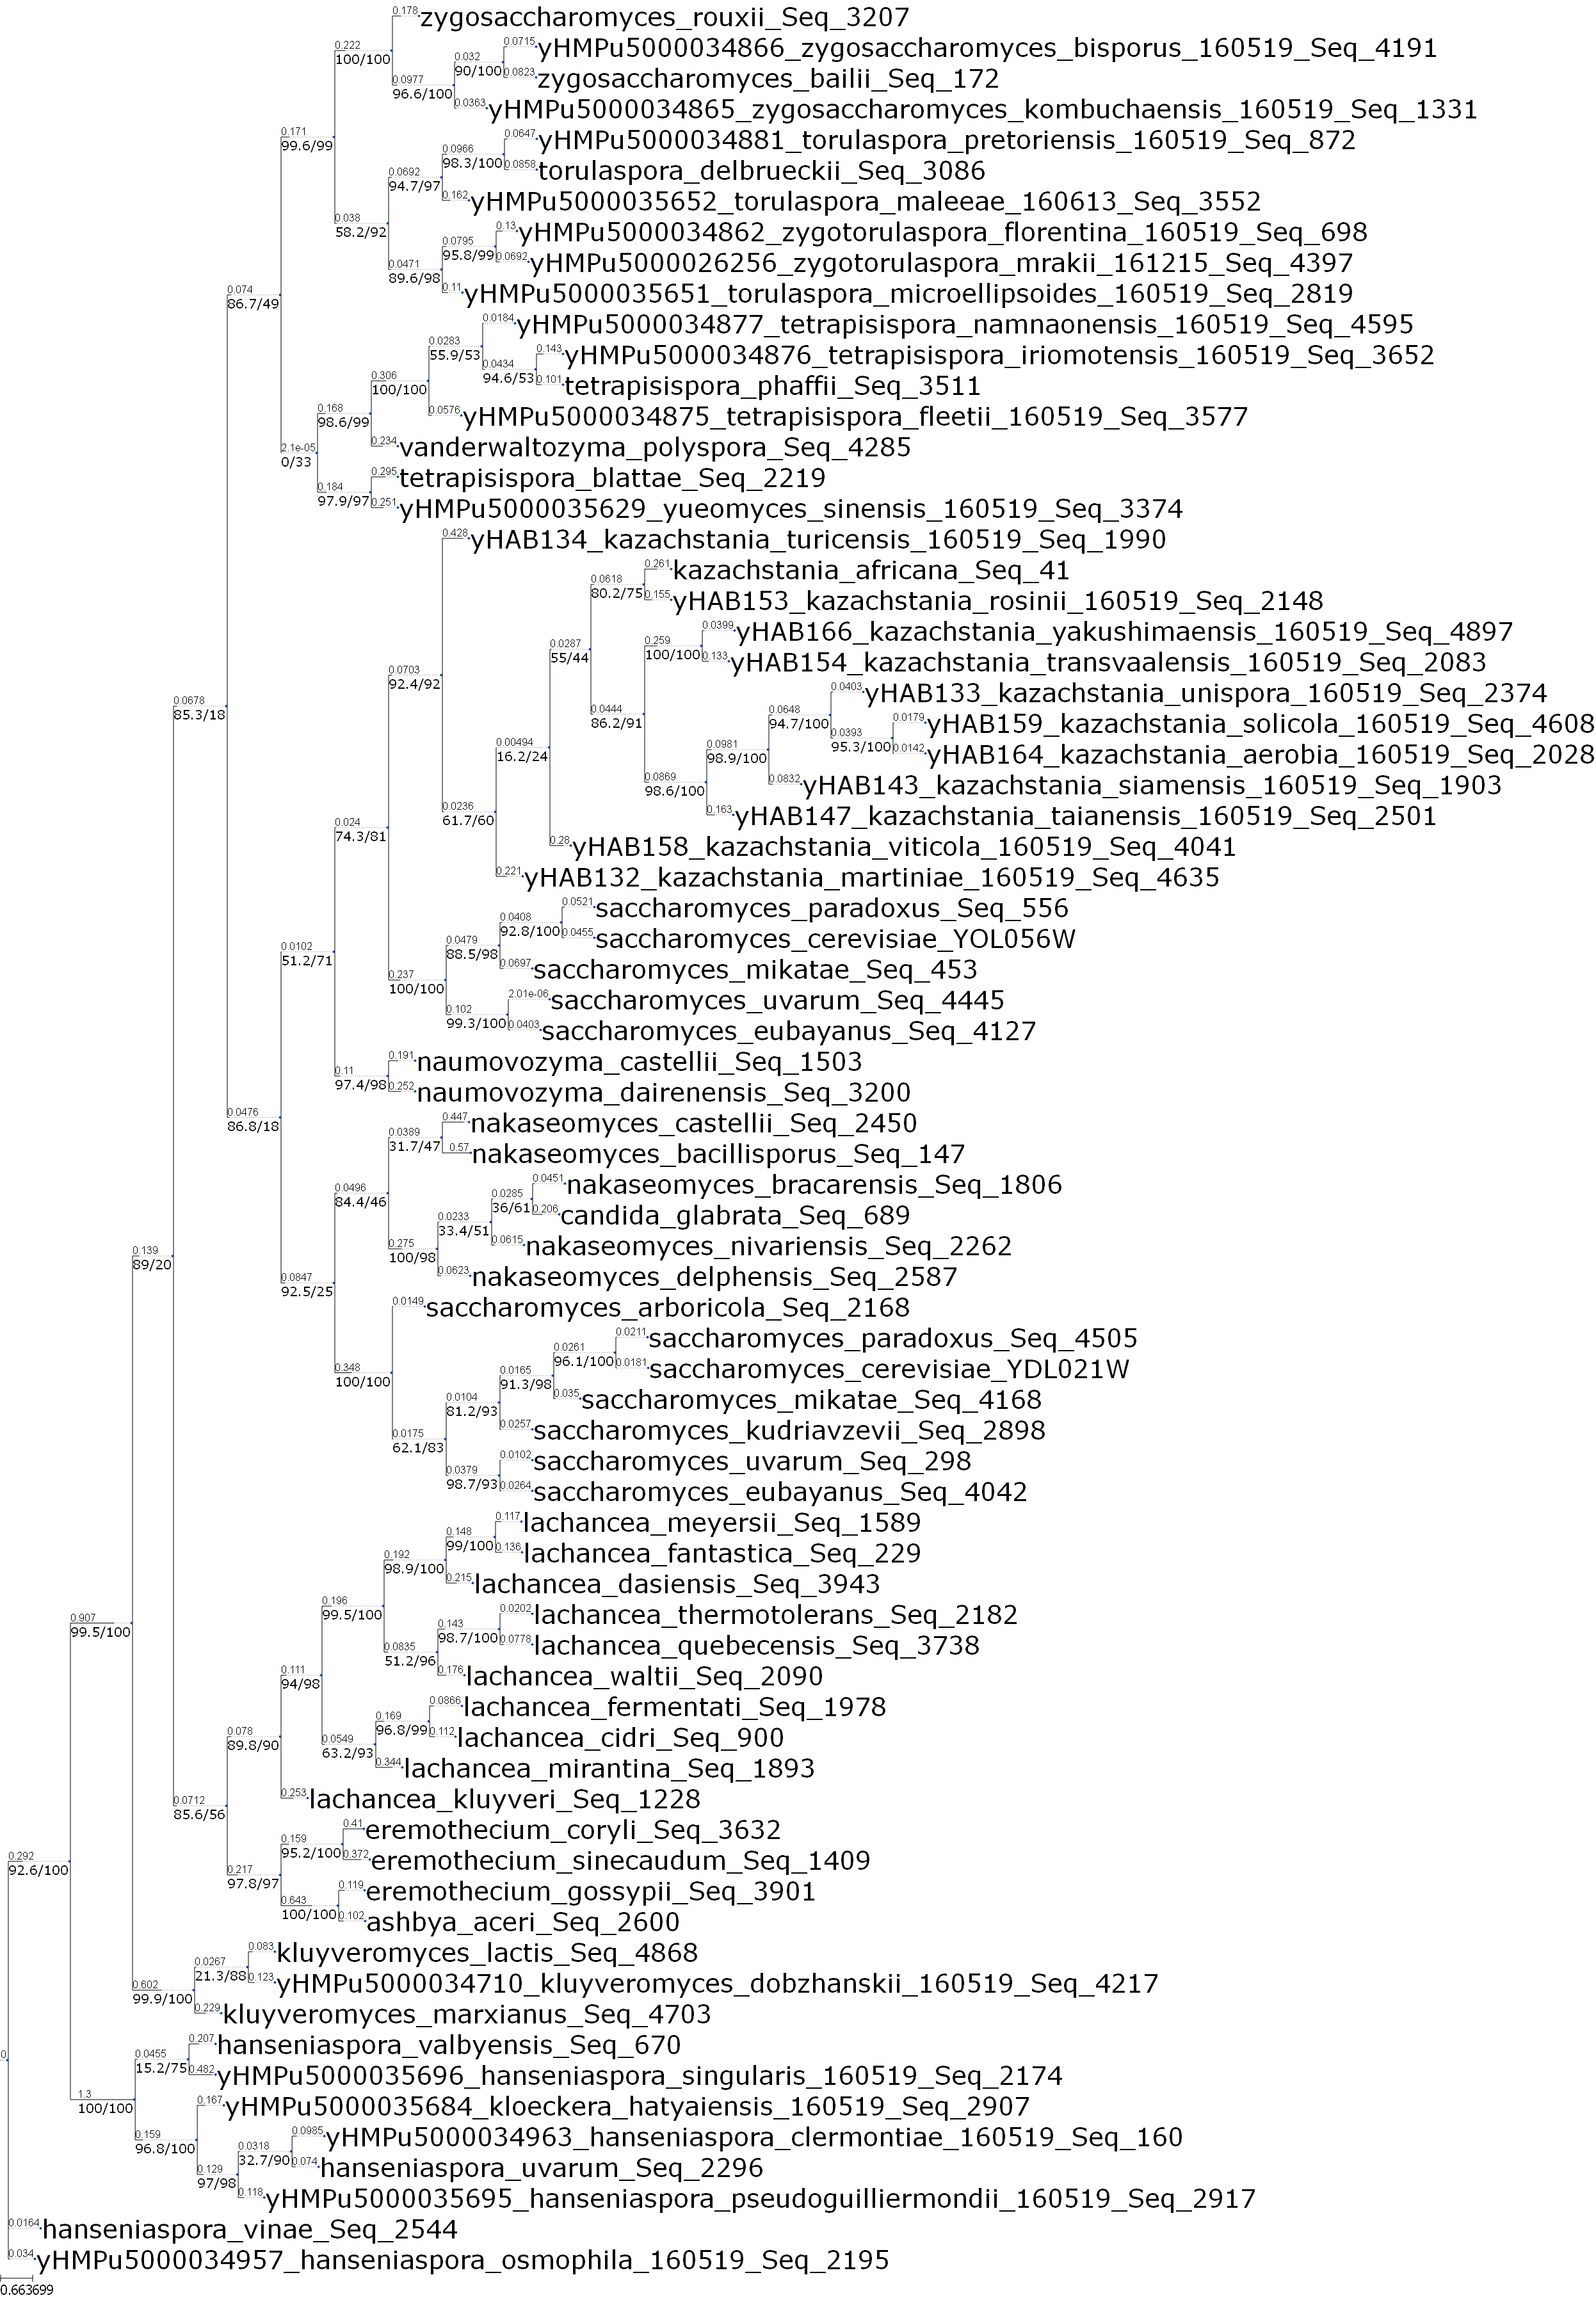

In [8]:
#Plot tree with branch support
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('_einsi_9','einsi_')}

goi_pair = 'GPM2_GPM3' #'GPM2_GPM3'#'GPM2_GPM3' #
og = goi_pair_og_lookup[goi_pair]

fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
t = Tree(fname_tree, format=1)  
ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = True

for node in t.traverse():
    if node.is_leaf():
        name_face = AttrFace("name",fsize=20)
        node.add_face(name_face, column=0, position="branch-right")  
    else:
    #if not(node.is_leaf()):
        node_label = TextFace(node.name)
        node.add_face(node_label, column=1, position = "branch-bottom")
t.render('%%inline', tree_style=ts)


In [100]:
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('4','')}     #('_einsi_9','einsi_')

goi_pair = 'EGO4_EGO2' #'GPM2_GPM3'#'GND2_GND1'#'GPM2_GPM3' #'EGO4_EGO2'
og = goi_pair_og_lookup[goi_pair]


fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
t = Tree(fname_tree, format=1)  

fname_out = figsave_dir + goi_pair + '.pdf'


#Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname,y1000_species_subset)

motif_names = ['TATA', 'STRE']#['STRE']#['TATA', 'STRE']
branch_labels = 'all' #'bootstrap'  #

(t,ts) = y1000plus_tools.plot_tree_proms(goi_pair, prom_phyls, t, y1000_species_subset, proms, motif_names, branch_labels)

t.render(fname_out, tree_style=ts)
#t.render('%%inline', tree_style=ts)


{'nodes': [[12.5, 238.4258764386177, 16.5, 242.4258764386177, 0, None],
  [81.5, 26.5, 85.5, 30.5, 1, None],
  [88.5, 81.5, 92.5, 85.5, 2, None],
  [112.5, 450.3517528772354, 116.5, 454.3517528772354, 3, None],
  [239.5, 189.78125, 243.5, 193.78125, 4, None],
  [272.5, 136.5, 276.5, 140.5, 5, None],
  [349.5, 243.0625, 353.5, 247.0625, 6, None],
  [418.5, 191.5, 422.5, 195.5, 7, None],
  [432.5, 294.625, 436.5, 298.625, 8, None],
  [489.5, 246.5, 493.5, 250.5, 9, None],
  [542.5, 342.75, 546.5, 346.75, 10, None],
  [611.5, 301.5, 615.5, 305.5, 11, None],
  [652.5, 384.0, 656.5, 388.0, 12, None],
  [709.5, 356.5, 713.5, 360.5, 13, None],
  [721.5, 411.5, 725.5, 415.5, 14, None],
  [222.5, 710.9222557544708, 226.5, 714.9222557544708, 15, None],
  [279.5, 466.5, 283.5, 470.5, 16, None],
  [332.5, 955.3445115089417, 336.5, 959.3445115089417, 17, None],
  [442.5, 562.75, 446.5, 566.75, 18, None],
  [499.5, 521.5, 503.5, 525.5, 19, None],
  [552.5, 604.0, 556.5, 608.0, 20, None],
  [609.5, 5

In [101]:
# Assign summary nodes for each tree, also assign outgroups to remove from the visualization
anc_nodes = {}
#Tuple contains node1, node2, Clade (for coloring)
anc_nodes['GND2_GND1'] = {'Zygosaccharomyces/Torulaspora': ('zygosaccharomyces_rouxii_Seq_3381', 'torulaspora_delbrueckii_Seq_2893','ZT' ), 
             'Saccharomyces High': ('saccharomyces_cerevisiae_YGR256W','saccharomyces_eubayanus_Seq_2030', 'high'), 
             'Saccharomyces Low' : ('saccharomyces_cerevisiae_YHR183W', 'saccharomyces_eubayanus_Seq_879', 'low' ), 
             'Kluyveromyces/Eremothecium': ('kluyveromyces_marxianus_Seq_4323','eremothecium_gossypii_Seq_1255', 'KLE'), 
             'Lachancea' : ('lachancea_mirantina_Seq_1227','lachancea_waltii_Seq_1709', 'KLE'), 
             'Hanseniaspora Outgroup': ('hanseniaspora_vinae_Seq_3519', 'hanseniaspora_valbyensis_Seq_1257', 'outgroup' ), 
             #'Distant Outgroups': ('candida_albicans_C1_13860C_A','ascoidea_rubescens_Seq_713', 'outgroup'),
             'Kazachstania Subset 1': ('yHAB155_kazachstania_spencerorum_160519_Seq_5608','yHAB134_kazachstania_turicensis_160519_Seq_2234', 'low' ),
             'Kazachstania Subset 2': ('yHAB133_kazachstania_unispora_160519_Seq_1356', 'yHAB154_kazachstania_transvaalensis_160519_Seq_432', 'high'),
             'Nakaseomyces': ('nakaseomyces_nivariensis_Seq_5143', 'candida_glabrata_Seq_5136', 'low'), 
             'Vanderwaltozyma/Tetrapisispora': ('vanderwaltozyma_polyspora_Seq_158', 'yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_2133', 'Post_WGH')
             #'5': ('kazachstania_africana_Seq_4332', 'yHAB155_kazachstania_spencerorum_160519_Seq_626')
            }

anc_nodes['GPM2_GPM3'] = {'Zygosaccharomyces/Torulaspora': ('zygosaccharomyces_rouxii_Seq_3207', 'torulaspora_delbrueckii_Seq_3086','ZT' ), 
             'Saccharomyces High': ('saccharomyces_cerevisiae_YDL021W',     'saccharomyces_arboricola_Seq_2168', 'high'), 
             'Saccharomyces Low' : ('saccharomyces_cerevisiae_YOL056W', 'saccharomyces_eubayanus_Seq_4127', 'low' ), 
             'Kluyveromyces': ('kluyveromyces_lactis_Seq_4868','kluyveromyces_marxianus_Seq_4703', 'KLE'), 
             'Lachancea' : ('lachancea_waltii_Seq_2090','lachancea_mirantina_Seq_1893', 'KLE'), 
             'Eremothecium' : ('eremothecium_coryli_Seq_3632','eremothecium_gossypii_Seq_3901', 'KLE'),
             'Hanseniaspora Outgroup': ('hanseniaspora_uvarum_Seq_2296', 'hanseniaspora_valbyensis_Seq_670', 'outgroup' ), 
             'Vanderwaltozyma/Tetrapisispora': ('yHMPu5000034877_tetrapisispora_namnaonensis_160519_Seq_4595','vanderwaltozyma_polyspora_Seq_4285', 'low' ),
             'Kazachstania': ('yHAB134_kazachstania_turicensis_160519_Seq_1990', 'yHAB132_kazachstania_martiniae_160519_Seq_4635', 'low'),   #'low/Post-WGH'), 
             'Nakaseomyces': ('nakaseomyces_bracarensis_Seq_1806', 'nakaseomyces_delphensis_Seq_2587', 'high')
            }

anc_nodes['EGO4_EGO2'] = {'Zygosaccharomyces': ('zygosaccharomyces_bailii_Seq_2449', 'zygosaccharomyces_rouxii_Seq_2640','ZT' ), 
             'Torulaspora': ('yHMPu5000034881_torulaspora_pretoriensis_160519_Seq_836', 'yHMPu5000035651_torulaspora_microellipsoides_160519_Seq_60', 'ZT'),
             'Saccharomyces High': ('saccharomyces_cerevisiae_YNR034W-A', 'saccharomyces_arboricola_Seq_2087', 'high'), 
             'Saccharomyces Low' : ('saccharomyces_cerevisiae_YCR075W-A', 'saccharomyces_eubayanus_Seq_1753', 'low' ), 
             'Kluyveromyces': ('kluyveromyces_lactis_Seq_4080','yHMPu5000034709_kluyveromyces_aestuarii_160519_Seq_1376', 'KLE'), 
             'Lachancea' : ('lachancea_waltii_Seq_3282','lachancea_thermotolerans_Seq_718', 'KLE'), 
             'Eremothecium' : ('eremothecium_sinecaudum_Seq_4061','eremothecium_gossypii_Seq_1412', 'KLE'),
             'Hanseniaspora Outgroup': ('hanseniaspora_uvarum_Seq_2694', 'yHMPu5000035696_hanseniaspora_singularis_160519_Seq_594', 'outgroup' ), 
             'Tetrapisispora': ('tetrapisispora_phaffii_Seq_1438', 'yHMPu5000034875_tetrapisispora_fleetii_160519_Seq_5131', 'Post_WGH'),
             'Naumovozyma castellii SSD': ('naumovozyma_castellii_Seq_527', 'naumovozyma_castellii_Seq_246', 'high'),
             'Nakaseomyces Subset 1': ('nakaseomyces_bracarensis_Seq_3421','nakaseomyces_delphensis_Seq_68', 'high' ),
             'Nakaseomyces Subset 2': ('candida_glabrata_Seq_2261', 'nakaseomyces_delphensis_Seq_4094', 'low'),
             'Kazachstania Subset': ('kazachstania_africana_Seq_1692', 'yHAB153_kazachstania_rosinii_160519_Seq_1089', 'low')
            }


outgroup_subtract_set = {}
outgroup_subtract_set['GND2_GND1'] = { 'candida_albicans_C1_13860C_A',
 'debaryomyces_hansenii_Seq_4538',
 'komagataella_pastoris_Seq_3804',
 'wickerhamomyces_anomalus_Seq_1012',
 'cyberlindnera_jadinii_Seq_3693',
 'ascoidea_rubescens_Seq_713',
 'ascoidea_rubescens_Seq_504'}

outgroup_subtract_set['GPM2_GPM3'] = set()

outgroup_subtract_set['EGO4_EGO2'] = set()

In [116]:
#Plot summary of trees
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('4','')}     #('_einsi_9','einsi_')

goi_pair = 'EGO4_EGO2' #'GPM2_GPM3'#'GND2_GND1'#'GPM2_GPM3' #'EGO4_EGO2'
og = goi_pair_og_lookup[goi_pair]

fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
fname_out = figsave_dir + goi_pair + '_summarized.pdf'  #important to save this as a pdf or it doesn't look right. 

#Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname, y1000_species_subset)


# t_abbrev, ts = y1000plus_tools.plot_tree_summary(goi_pair, fname_tree, y1000_species_subset, anc_nodes, outgroup_subtract_set, prom_phyls, proms)
# t_abbrev.render(fname_out, tree_style = ts)
# t_abbrev.render('%%inline', tree_style=ts)


In [117]:
#Need to incorporate this into the function



#plot_tree_summary(goi_pair, fname_tree, y1000_species_subset, anc_nodes, outgroup_subtract_set, prom_phyls, proms)
#Plots a summary tree given node pairs to summarize along with the average of the STRE count within a range
#defined in this function as L_STRE_count
#returns t_abbrev, an ete3 tree object which is a subset of the original tree. 

sacc_families = {'Candida': 'Post_WGH',
                 'Kazachstania': 'Post_WGH',
                 'Nakaseomyces': 'Post_WGH',
                 'Naumovozyma': 'Post_WGH',
                 'Saccharomyces': 'Post_WGH',
                 'Tetrapisispora': 'Post_WGH',
                 'Vanderwaltozyma': 'Post_WGH',
                 'Yueomyces': 'Post_WGH',
                 'Zygosaccharomyces': 'ZT',
                 'Zygotorulaspora': 'ZT',
                 'Torulaspora': 'ZT',
                 'Kluyveromyces': 'KLE',
                 'Lachancea': 'KLE',
                 'Eremothecium': 'KLE',
                 'Ashbya': 'KLE'
                }

#Color Node by species: 
sacc_colors = {'KLE': "#deb9f6", #e4cee4",#"#C6AFE9", 
               'ZT': "YellowGreen",
               'Post_WGH': "LightYellow" #White" # "LightYellow"
              }

post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
                   'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


node_color_dict = {'KLE':"#deb9f6",
                   'ZT': "YellowGreen",
                   'Post_WGH': "LightYellow",   #default color for post WGH
                   'low': '#8cc3f6',    #syntenic orthologs of low LFC ohnolog
                   'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
                   'outgroup': 'LightGrey'
                  }

L_STRE_count = 700
cmap_STRE = cm.get_cmap('Reds')
vmin = 0.0
vmax = 7.0
cmap_STRE_norm = colors.Normalize(vmin=vmin, vmax=vmax)
#box params:
width_box = 48
count_font = 14
grouped_node_font = 15
height_box_grouped = 58

minor_node_font = 10
minor_node_stre_font = 10
height_box_minor=36
support_font= 7




t = Tree(fname_tree, format=1)
t.ladderize()
ts = TreeStyle()

ts_scale = 60 # 120 pixels per branch length unit
#ts.branch_vertical_margin = 5 # 10 pixels between adjacent branches

ts.show_leaf_name = False#True
# ts.show_branch_length = True
# ts.mode = "c"
# ts.arc_start = -90 # 0 degrees = 3 o'clock
# ts.arc_span = 180
t_abbrev = t.copy()



for node in t_abbrev.traverse():
    if node.is_leaf():
        #Get the species and gets the gene_id for finding promoter sequences
        if 'saccharomyces_cerevisiae' in node.name:       
            species='saccharomyces_cerevisiae'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        elif 'candida_albicans' in node.name: 
            species = 'candida_albicans'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        else: 
            species = '_'.join(node.name.split('_')[:-2])
            gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])


        #color node by major clade / family if in Sacch clade
        row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
        maj_clade = row['Major clade'].values[0]

        if maj_clade == 'Saccharomycetaceae':
            genus = row['Genus'].values[0]
            node_color = sacc_colors[sacc_families[genus]]
            if node.name in prom_phyls[goi_pair]['low']: 
                node_color = post_WGH_colors['low']
            elif node.name in prom_phyls[goi_pair]['high']: 
                node_color = post_WGH_colors['high']    
        #species == outgroup_orig_genome:
        #elif species == 'hanseniaspora_vinae':
        #    node_color = 'LightGrey'
        else:
            node_color = 'LightGrey'
            #node_color = maj_clade_colors[maj_clade]

        nstyle = NodeStyle()
        nstyle['bgcolor']=node_color
        node.set_style(nstyle)

        ##Add face for node distance
        #node_dist = TextFace('{:.3f}'.format(node.dist), fsize=8, fstyle='italic')
        #node.add_face(node_dist, column=1, position = "branch-bottom")

        #node label
        node_name_label = AttrFace("name", fsize=minor_node_font, fgcolor="grey", tight_text=True)
        node.add_face(node_name_label, column=1, position = "aligned")

        #add face for number of STREs within L_STRE_count basepairs        
        prom_results = proms.loc[gene_id]

        N_STRE = 0
        for result in prom_results['STRE_full_features']:
            if result[0]<L_STRE_count:
                N_STRE = N_STRE+1

        rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(N_STRE)))

        rectFace_STRE = RectFace(width=width_box, height=height_box_minor, fgcolor='black', bgcolor=rgb, 
                            label= {"text": str(N_STRE), 
                                    "color": 'grey', 
                                    "fontsize": minor_node_stre_font,
                                    "font": 'Verdana'
                                   }
                           )
        node.add_face(rectFace_STRE, column = 2, position= "aligned")



    else:    # If node is not a leaf, add the support label.  Red if support greater than 90

        node_val=node.name.split('/')[0]

        if node_val != '':
            if float(node_val)>95:
                support_color = 'black'
            elif float(node_val)>80:
                support_color = 'blue'
            else: 
                support_color = 'red'
            node_label = TextFace(' ' + node.name.split('/')[0], fsize=support_font, fgcolor = support_color)
            node.add_face(node_label, column=1, position = "branch-bottom")
            #node_dist = TextFace('{:.3f}'.format(node.dist), fsize=8, fstyle='italic')
            #node.add_face(node_dist, column=1, position = "branch-bottom")


left_leaves = set(t_abbrev.get_leaf_names())
for node_name, (node1, node2, node_group) in anc_nodes[goi_pair].items(): 
    anc_node = t_abbrev.get_common_ancestor([node1, node2])
    #print(anc_node.name)
    if len(anc_node.name.split('/'))==2:
        anc_node.add_features(shalrt=anc_node.name.split('/')[0], bootstrap=anc_node.name.split('/')[1])
    else:
        anc_node.add_features(shalrt=np.nan,bootstrap = np.nan)
    anc_node.add_features()
    anc_node.name = node_name
    left_leaves = left_leaves - set(anc_node.get_leaf_names())
    nstyle = NodeStyle()
    node_color = node_color_dict[node_group]
    nstyle['bgcolor']=node_color
    anc_node.set_style(nstyle)

    #grouped node label
    summarized_nodes = anc_node.get_leaves()

    grouped_node_face = TextFace(anc_node.name + " ({})".format(len(summarized_nodes)), fsize=grouped_node_font, fgcolor="black", tight_text=True)
    anc_node.add_face(grouped_node_face, column=1, position = "aligned")
    #print(left_leaves)

    #Add a face for STRE numbers      

    gene_ids = []
    for node in summarized_nodes:
        if 'saccharomyces_cerevisiae' in node.name:       
            species='saccharomyces_cerevisiae'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        elif 'candida_albicans' in node.name: 
            species = 'candida_albicans'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        else: 
            species = '_'.join(node.name.split('_')[:-2])
            gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])
        gene_ids.append(gene_id)

    STRE_counts = []
    for gene_id in gene_ids: 
        prom_results = proms.loc[gene_id]
        N_STRE = 0
        for result in prom_results['STRE_full_features']:
            if result[0]<L_STRE_count:
                N_STRE = N_STRE+1
        STRE_counts.append(N_STRE)

    rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(np.mean(STRE_counts))))

    rectFace_STRE = RectFace(width=width_box, height=height_box_grouped, fgcolor='black', bgcolor=rgb, 
                            label= {"text": '{:0.2f}'.format(np.mean(STRE_counts)), 
                                    "color": 'black', 
                                    "fontsize": count_font, 
                                    "font": 'Verdana'
                                   }
                             )
    anc_node.add_face(rectFace_STRE, column = 2, position= "aligned")


left_leaves = left_leaves - outgroup_subtract_set[goi_pair]

t_abbrev.prune(list(anc_nodes[goi_pair].keys()) + list(left_leaves))



#t_abbrev.render('%%inline', tree_style=ts)
t_abbrev.render(fname_out, tree_style = ts)

{'nodes': [[0.5, 93.5589427947998, 4.5, 97.5589427947998, 0, None],
  [5.476918702190658, 17.0, 9.476918702190659, 21.0, 1, None],
  [3.5001228086064646, 53.0, 7.500122808606465, 57.0, 2, None],
  [34.5, 170.1178855895996, 38.5, 174.1178855895996, 3, None],
  [87.5, 100.0, 91.5, 104.0, 4, None],
  [87.5, 240.23577117919922, 91.5, 244.23577117919922, 5, None],
  [98.85218569482512, 147.0, 102.85218569482512, 151.0, 6, None],
  [140.5, 333.47154235839844, 144.5, 337.47154235839844, 7, None],
  [193.5, 210.0, 197.5, 214.0, 8, None],
  [209.45314819955837, 183.0, 213.45314819955837, 187.0, 9, None],
  [246.5, 237.0, 250.5, 241.0, 10, None],
  [254.578855831615, 219.0, 258.578855831615, 223.0, 11, None],
  [252.61859207396634, 255.0, 256.61859207396634, 259.0, 12, None],
  [193.5, 456.9430847167969, 197.5, 460.9430847167969, 13, None],
  [246.5, 331.0, 250.5, 335.0, 14, None],
  [299.5, 302.0, 303.5, 306.0, 15, None],
  [299.5, 360.0, 303.5, 364.0, 16, None],
  [246.5, 582.8861694335938, 25

In [46]:
#Calculation to figure out where STREs and TATA boxes are in the promoter for GPM2/3


(node1, node2, color_scheme) = anc_nodes['GPM2_GPM3']['Saccharomyces High']


t = Tree(fname_tree, format=1)

t2 = t.get_common_ancestor(node1, node2)
t2.get_leaf_names()

leaf_inds = []
for leaf in t2.get_leaf_names():
    leaf_inds.append('_'.join(leaf.split('_')[0:2]) + '@' + '_'.join(leaf.split('_')[2:]))
leaf_inds


proms.loc[leaf_inds,['STRE_full_features']].to_dict()

{'STRE_full_features': {'saccharomyces_arboricola@Seq_2168': [(508,
    'rev',
    'AACCCCTTA')],
  'saccharomyces_cerevisiae@YDL021W': [(424, 'rev', 'AACCCCTTA')],
  'saccharomyces_eubayanus@Seq_4042': [(481, 'rev', 'AACCCCTTA')],
  'saccharomyces_kudriavzevii@Seq_2898': [(482, 'rev', 'AACCCCTTA')],
  'saccharomyces_mikatae@Seq_4168': [(476, 'rev', 'AACCCCTTA')],
  'saccharomyces_paradoxus@Seq_4505': [(456, 'rev', 'AACCCCTTA')],
  'saccharomyces_uvarum@Seq_298': [(475, 'rev', 'AACCCCTTA')]}}

## Visualize time calibrated tree for Fig 3
<a id=time_tree> </a>

In [56]:
t.get_leaf_names()

['Babjeviella_inositovora',
 'Millerozyma_acaciae',
 'Debaryomyces_maramus',
 'Debaryomyces_nepalensis',
 'Debaryomyces_hansenii',
 'Debaryomyces_prosopidis',
 'Debaryomyces_fabryi',
 'Debaryomyces_subglobosus',
 'Priceomyces_carsonii',
 'Priceomyces_medius',
 'Priceomyces_castillae',
 'Priceomyces_haplophilus',
 'Scheffersomyces_lignosus',
 'Scheffersomyces_stipitis',
 'Spathaspora_passalidarum',
 'Spathaspora_girioi',
 'Spathaspora_arborariae',
 'Spathaspora_gorwiae',
 'Spathaspora_hagerdaliae',
 'Candida_sojae',
 'Candida_tropicalis',
 'Candida_albicans',
 'Candida_dubliniensis',
 'Candida_corydali',
 'Lodderomyces_elongisporus',
 'Candida_orthopsilosis',
 'Candida_parapsilosis',
 'Aciculoconidium_aculeatum',
 'Kodamaea_laetipori',
 'Candida_restingae',
 'Kodamaea_ohmeri',
 'Suhomyces_pyralidae',
 'Suhomyces_tanzawaensis',
 'Suhomyces_emberorum',
 'Suhomyces_canberraensis',
 'Wickerhamia_fluorescens',
 'Teunomyces_gatunensis',
 'Teunomyces_kruisii',
 'Teunomyces_cretensis',
 'Candid

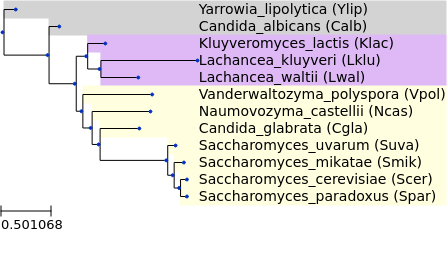

In [63]:
y1000plus_dir = '/home/heineike/genomes/y1000plus/'
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)

ts = TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_length = True

# for node in t.traverse():
#     if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")

# post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
#                    'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


node_color_dict = {'KLE':"#deb9f6",
                   'ZT': "YellowGreen",
                   'Post_WGH': "LightYellow",   #default color for post WGH
                   'low': '#8cc3f6',    #syntenic orthologs of low LFC ohnolog
                   'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
                   'outgroup': 'LightGrey'
                  }


leaves_to_view = {'Yarrowia_lipolytica':('outgroup', 'Ylip'),
                  'Candida_albicans': ('outgroup','Calb'),
                'Lachancea_kluyveri': ('KLE','Lklu'),
                 'Lachancea_waltii':  ('KLE','Lwal'),
                 'Kluyveromyces_lactis': ('KLE','Klac'),
                  'Vanderwaltozyma_polyspora': ('Post_WGH','Vpol'),
                 'Naumovozyma_castellii': ('Post_WGH','Ncas'),
                 'Candida_glabrata': ('Post_WGH','Cgla'),
                 #'Saccharomyces_eubayanus': ('post_WGH','Seub'),
                 'Saccharomyces_uvarum': ('Post_WGH','Suva'),
                 'Saccharomyces_mikatae': ('Post_WGH','Smik'),
                 'Saccharomyces_cerevisiae': ('Post_WGH','Scer'),
                  'Saccharomyces_paradoxus': ('Post_WGH','Spar')
                 }

t.prune(leaves_to_view.keys())

t.ladderize()

for node in t.get_leaves():
    name = node.name
    group, abbrev = leaves_to_view[name]
    
    nstyle = NodeStyle()
    node_color = node_color_dict[group]
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    node_label_face = TextFace(name + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")

fname = home_dir + 'scratch/time_tree_exp_species.svg'
t.render(fname, tree_style=ts)
t.render('%%inline', tree_style=ts)


In [ ]:

    
grouped_node_face = TextFace(anc_node.name + " ({})".format(len(summarized_nodes)), fsize=16, fgcolor="black")

        nstyle = NodeStyle()
        node_color = node_color_dict[node_group]
        nstyle['bgcolor']=node_color
        anc_node.set_style(nstyle)

## Plot Promoters for just the species present in the stress expression dataset



In [7]:
leaves_to_view = {'Yarrowia_lipolytica':('outgroup', 'Ylip'),
                  'Candida_albicans': ('outgroup','Calb'),
                'Lachancea_kluyveri': ('KLE','Lklu'),
                 'Lachancea_waltii':  ('KLE','Lwal'),
                 'Kluyveromyces_lactis': ('KLE','Klac'),
                  'Vanderwaltozyma_polyspora': ('Post_WGH','Vpol'),
                 'Naumovozyma_castellii': ('Post_WGH','Ncas'),
                 'Candida_glabrata': ('Post_WGH','Cgla'),
                 #'Saccharomyces_eubayanus': ('post_WGH','Seub'),
                 'Saccharomyces_uvarum': ('Post_WGH','Suva'),
                 'Saccharomyces_mikatae': ('Post_WGH','Smik'),
                 'Saccharomyces_cerevisiae': ('Post_WGH','Scer'),
                  'Saccharomyces_paradoxus': ('Post_WGH','Spar')
                 }


In [34]:
exp_subset = {}

exp_subset['EGO4_EGO2']= {
  #'Calb': ('outgroup','Calb'),
 'lachancea_kluyveri_Seq_3656': ('Lklu', 'KLE'), 
 'lachancea_waltii_Seq_3282': ('Lwal', 'KLE'),
 'kluyveromyces_lactis_Seq_4080': ('Klac', 'KLE'),  
 'vanderwaltozyma_polyspora_Seq_2530': ('Vpol_low', 'Post_WGH'), 
 'naumovozyma_castellii_Seq_2431':('Ncas_low', 'low'), 
 'saccharomyces_uvarum_Seq_2910': ('Suva_low', 'low'),  # no exp data, no ortholog listed, and couldn't find sequence in regev AA dataset. 
 #'Seub_low': 'saccharomyces_eubayanus_Seq_1753'
 'saccharomyces_mikatae_Seq_3347': ('Smik_low', 'low'),
 'saccharomyces_paradoxus_Seq_2952': ('Spar_low', 'low'),
 'saccharomyces_cerevisiae_YCR075W-A': ('Scer_low','low'),  # no exp data:  gene in dataset
 'naumovozyma_castellii_Seq_246': ('Ncas_high_0', 'high'),  ##SSD, this was missing as an ortholog
 'naumovozyma_castellii_Seq_527': ('Ncas_high_1', 'high'),
 'candida_glabrata_Seq_4115': ('Cgla_high', 'high'), #No exp data, and gene CAGL0M11000g wasn't in regev dataset 
 'saccharomyces_uvarum_Seq_2980': ('Suva_high', 'high'),
#'Seub_high':'',
 'saccharomyces_mikatae_Seq_3708': ('Smik_high', 'high'),
 'saccharomyces_paradoxus_Seq_2332': ('Spar_high','high'),
 'saccharomyces_cerevisiae_YNR034W-A': ('Scer_high', 'high')
}

exp_subset['GPM2_GPM3']= {  #maybe there are orthologs past hansenii, but might have just stopped there for example
  'lachancea_kluyveri_Seq_1228': ('Lklu', 'KLE'), 
  'lachancea_waltii_Seq_2090': ('Lwal', 'KLE'),
  'kluyveromyces_lactis_Seq_4868': ('Klac', 'KLE'),  
  'vanderwaltozyma_polyspora_Seq_4285': ('Vpol_high', 'low'), #should verify these are the same protein
  'naumovozyma_castellii_Seq_1503':('Ncas_low', 'low'), 
  'saccharomyces_uvarum_Seq_4445': ('Suva_low', 'low'), 
#  #'Seub_low': 'saccharomyces_eubayanus_Seq_1753'
  'saccharomyces_mikatae_Seq_453': ('Smik_low', 'low'),
  'saccharomyces_paradoxus_Seq_556': ('Spar_low', 'low'),
  'saccharomyces_cerevisiae_YOL056W': ('Scer_low','low'),  
  'candida_glabrata_Seq_689': ('Cgla_high', 'high'),
  'saccharomyces_uvarum_Seq_298': ('Suva_high', 'high'),
# #'Seub_high':'',
  'saccharomyces_mikatae_Seq_4168': ('Smik_high', 'high'),  #not in regev dataset
  'saccharomyces_paradoxus_Seq_4505': ('Spar_high','high'),
  'saccharomyces_cerevisiae_YDL021W': ('Scer_high', 'high')
}
    

In [30]:
# #Plot tree and promoters of subset without expression
# N_tree_dict = {'GND2_GND1':('7',''),
#                'GPM2_GPM3':('4',''),
#                'EGO4_EGO2':('4','')}

# goi_pair = 'GPM2_GPM3'#'GPM2_GPM3' #'GND2_GND1'#
# og = goi_pair_og_lookup[goi_pair]


# fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
# t = Tree(fname_tree, format=1)   

# leaves = list(exp_subset[goi_pair].keys())#[item for key, item in exp_subset['EGO4_EGO2'].items()]
# t_exp_subset = t.copy()
# t_exp_subset.prune(leaves)

# fname_out = home_dir + 'scratch/' + goi_pair + '.svg'


# #Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
# promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
# proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname,y1000_species_subset)

# motif_names = ['STRE']#['TATA', 'STRE']
# branch_labels = 'all' #'bootstrap'  #

# (t_exp_subset,ts) = y1000plus_tools.plot_tree_proms(goi_pair, prom_phyls, t_exp_subset, y1000_species_subset, proms, motif_names, branch_labels)

# #t.render(fname_out, tree_style=ts)
# t_exp_subset.render('%%inline', tree_style=ts)

KeyError: 'GPM2_GPM3'

In [94]:
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('4','')}

goi_pair = 'EGO4_EGO2'#'GPM2_GPM3' #'EGO4_EGO2'# 'GND2_GND1'#

goi_exp_data = pd.read_csv(y1000plus_tools.home_dir + os.path.normpath('github/yeast_esr_expression_analysis/expression_data/regev_data/20210219_'+goi_pair + '.csv'), index_col=0)


og = goi_pair_og_lookup[goi_pair]

fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
t = Tree(fname_tree, format=1)   

leaves = list(exp_subset[goi_pair].keys())#[item for key, item in exp_subset['EGO4_EGO2'].items()]
t_exp_subset = t.copy()
t_exp_subset.prune(leaves)

fname_out = figsave_dir + goi_pair + '_exp.pdf'

#Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname,y1000_species_subset)

motif_names = ['TATA', 'STRE']
branch_labels = 'bootstrap'  # 'all'


exp_subset_goi = exp_subset[goi_pair]

(t_exp_subset,ts) = y1000plus_tools.plot_tree_proms_exp_data(goi_pair, prom_phyls, t_exp_subset, y1000_species_subset, proms, motif_names, branch_labels, goi_exp_data, exp_subset[goi_pair])

#t_exp_subset.render('%%inline', tree_style=ts)
t_exp_subset.render(fname_out, tree_style=ts)

{'nodes': [[0.5, 99.7080078125, 4.5, 103.7080078125, 0, None],
  [37.46834680297957, 26.5, 41.46834680297957, 30.5, 1, None],
  [64.5, 172.916015625, 68.5, 176.916015625, 2, None],
  [72.18909692625544, 81.5, 76.18909692625544, 85.5, 3, None],
  [128.5, 264.33203125, 132.5, 268.33203125, 4, None],
  [147.12825386665605, 136.5, 151.12825386665605, 140.5, 5, None],
  [192.5, 392.1640625, 196.5, 396.1640625, 6, None],
  [256.5, 243.0625, 260.5, 247.0625, 7, None],
  [337.43345800788234, 191.5, 341.43345800788234, 195.5, 8, None],
  [336.892461823086, 294.625, 340.892461823086, 298.625, 9, None],
  [341.66240183619107, 246.5, 345.66240183619107, 250.5, 10, None],
  [400.892461823086, 342.75, 404.892461823086, 346.75, 11, None],
  [411.48375886468943, 301.5, 415.48375886468943, 305.5, 12, None],
  [464.892461823086, 384.0, 468.892461823086, 388.0, 13, None],
  [473.107786997823, 356.5, 477.107786997823, 360.5, 14, None],
  [476.6995407438305, 411.5, 480.6995407438305, 415.5, 15, None],
  [2

In [86]:
goi_exp_data

,DS/LOG,PS/LOG,PLAT/LOG,heat shock_030,heat shock_045
Scer_high,6.079359,7.348170,6.611801,3.385376,4.383356
Spar_high,2.997094,5.232169,4.586766,NaN,NaN
Smik_high,4.107135,3.802202,4.619356,NaN,NaN
Suva_high,2.497823,3.429522,1.209906,NaN,NaN
Cgla_high,NaN,NaN,NaN,NaN,NaN
Ncas_high_0,0.272247,8.014472,10.782891,3.424093,4.275979
Ncas_high_1,-0.198769,0.685898,1.815871,-0.361611,-0.391733
Vpol_high,NaN,NaN,NaN,NaN,NaN
Scer_low,NaN,NaN,NaN,NaN,NaN
Spar_low,0.248152,0.115706,0.019242,NaN,NaN


<IPython.core.display.Javascript object>


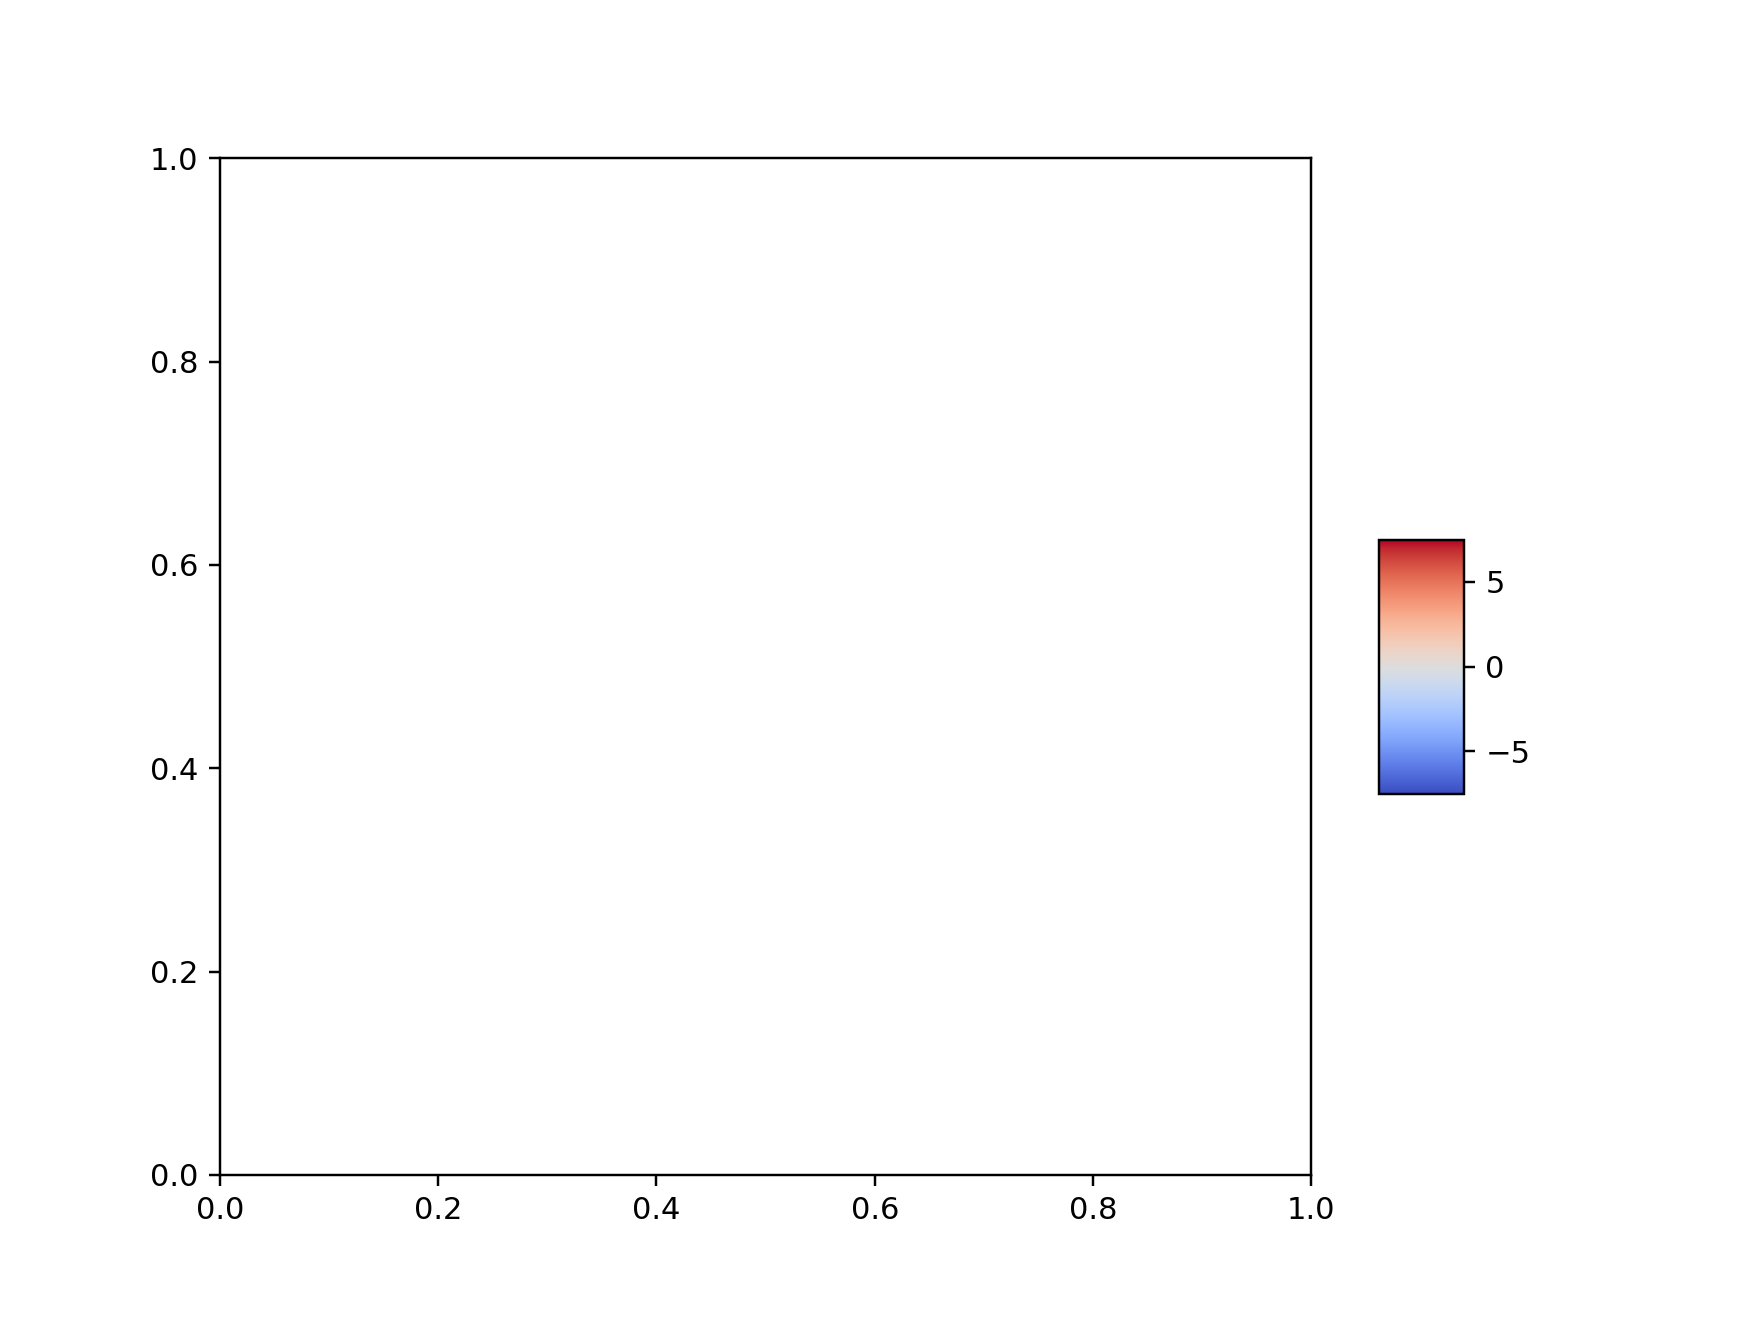

In [95]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = cm.get_cmap('coolwarm')
vmin = -7.5
vmax = 7.5
norm = colors.Normalize(vmin=vmin, vmax=vmax)


fig = plt.figure(figsize=(8,6))
#ax1 = fig.add_axes([0.10,0.10,0.70,0.85])

# for i,n in enumerate(np.linspace(0,2,N)):
#     y = np.sin(x)*x**n
#     ax1.plot(x,y,c=cmap(i))

# plt.xlabel('x')
# plt.ylabel('y')

#norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
plt.colorbar(sm, ticks=np.arange(-5,10.0,5), aspect=3, shrink = 0.25) #, 
 #boundaries=np.arange(-0.05,2.1,.1))

fig.savefig(figsave_dir + 'goi_exp_colorbar.svg')

